<a href="https://colab.research.google.com/github/uday1257/AIML-LAB/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

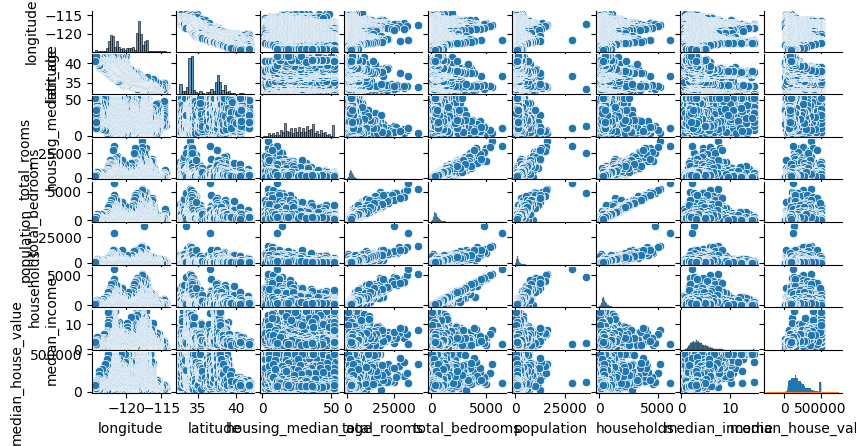

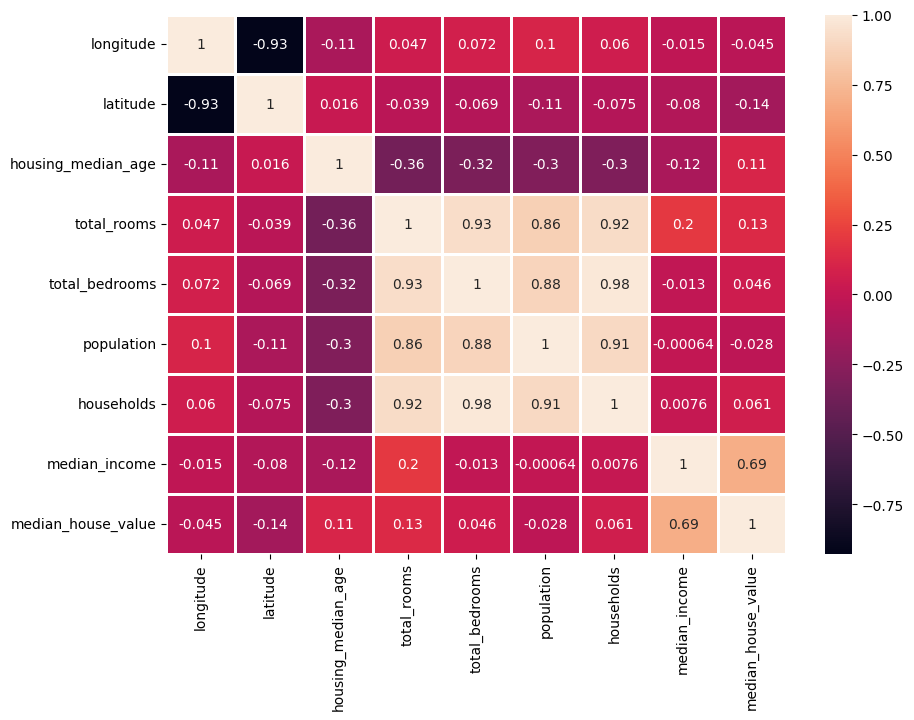

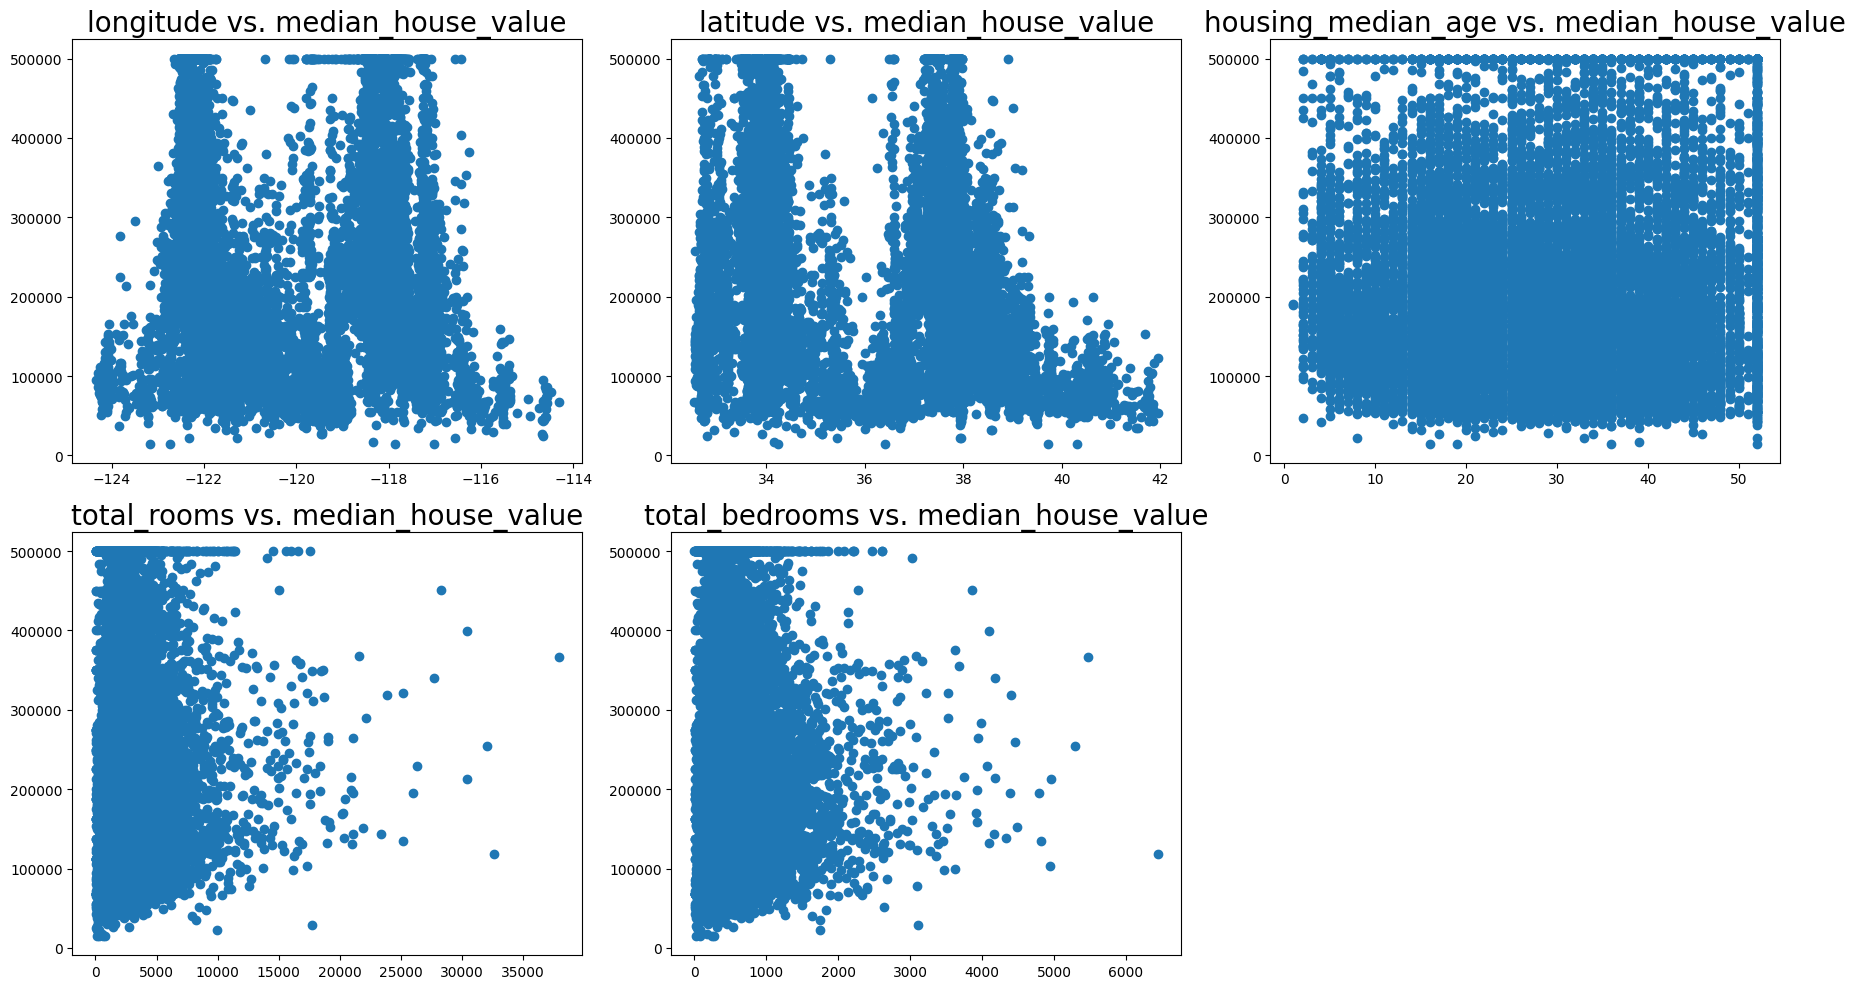

R-squared value of this fit: 0.577
Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (3400,)
Mean absolute error (MAE): 56561.26241708552
Mean square error (MSE): 6223628238.22346
Root mean square error (RMSE): 78889.97552429244
R-squared value of predictions: 0.549
MinMax for scaled predictions: -114.80050056672393 63.508071896216386
L value for scaled Price=100: 1.2046560499011798


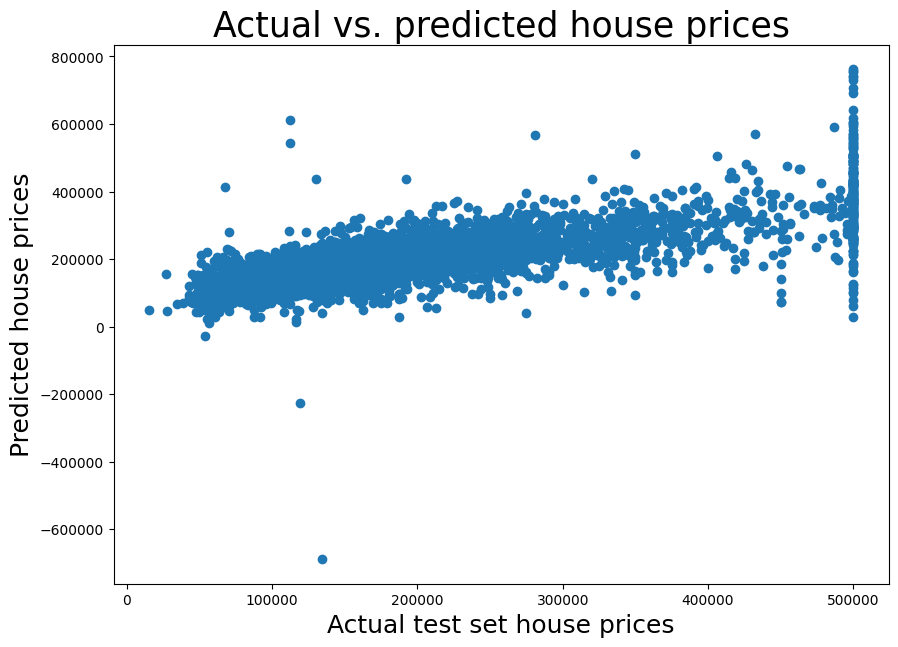

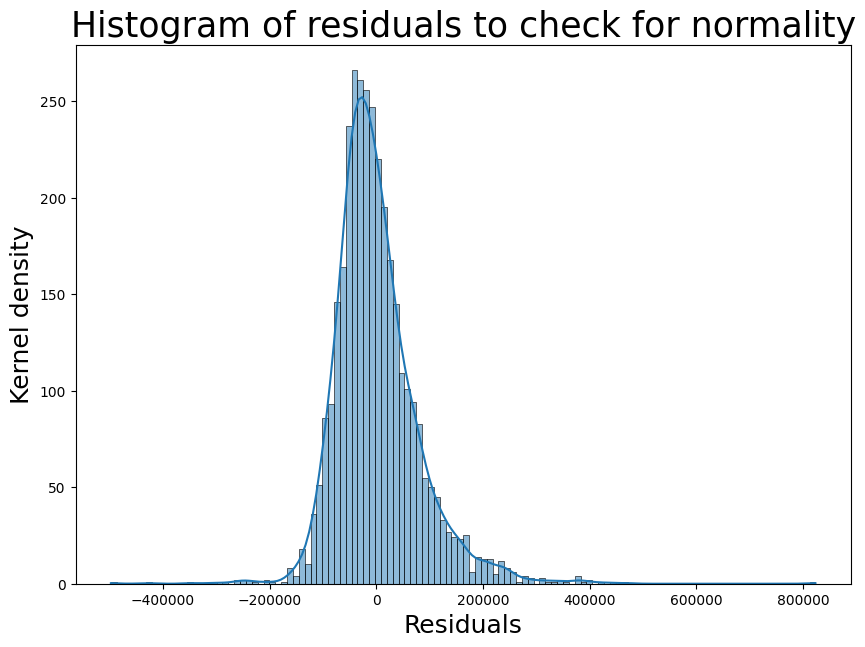

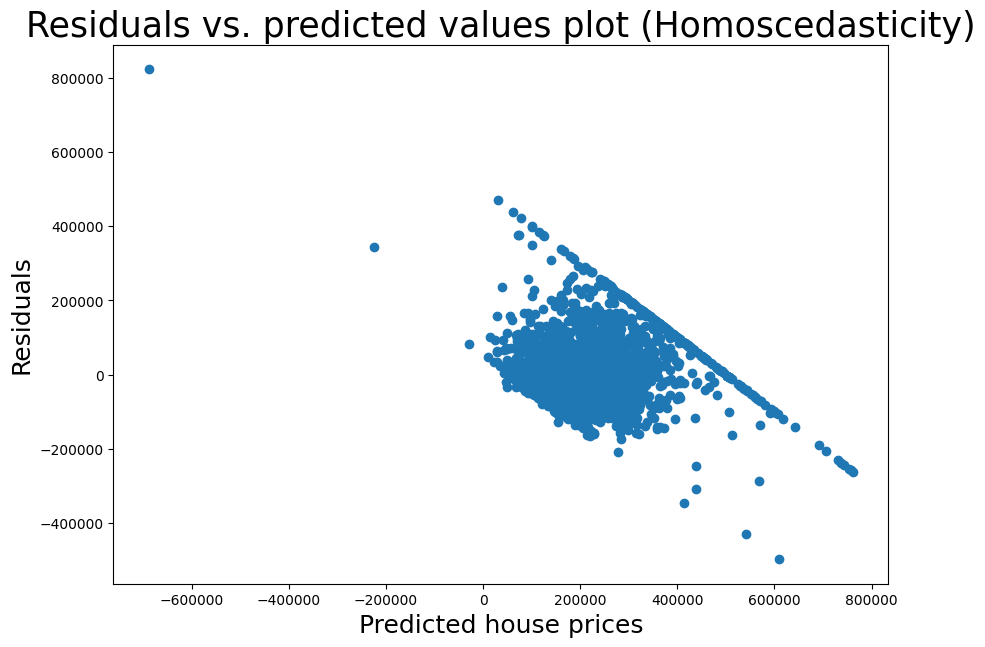

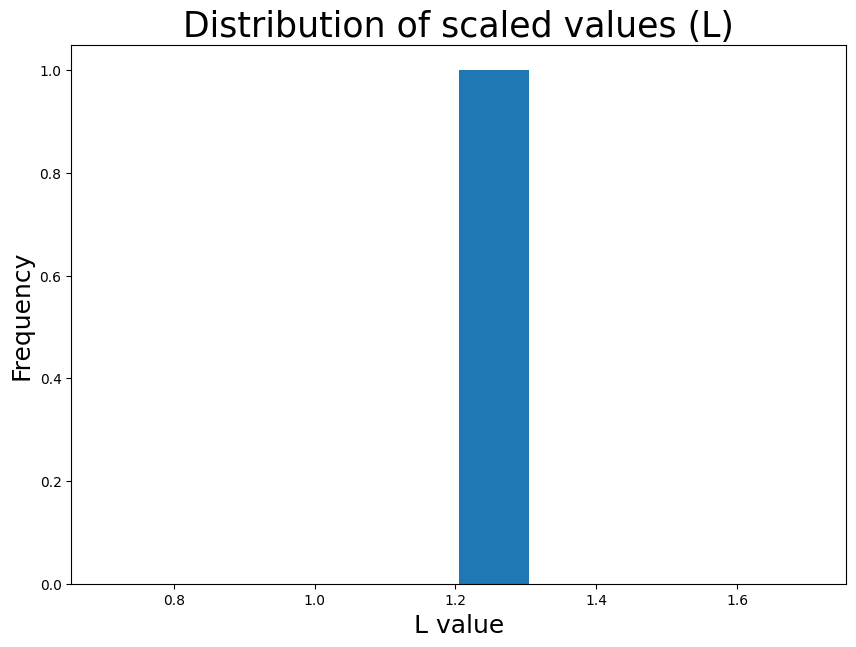

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import gridspec
%matplotlib inline

# Load and explore data
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
print(df.head())
df.info(verbose=True)
print(df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
print(df.columns)

# Data visualization
sns.pairplot(df)
df['median_house_value'].plot.hist(bins=25, figsize=(8, 4))
df['median_house_value'].plot.density()
print(df.corr())

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, linewidths=2)

# Feature selection
l_column = list(df.columns)  # List of column names
len_feature = len(l_column)  # Number of features
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]
print("Feature set size:", X.shape)
print("Variable set size:", y.shape)
print(X.head())
print(y.head())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Training feature set size:", X_train.shape)
print("Test feature set size:", X_test.shape)
print("Training variable set size:", y_train.shape)
print("Test variable set size:", y_test.shape)

# Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)

# Coefficients DataFrame
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
print(cdf)

# Standard error calculation
n = X_train.shape[0]
k = X_train.shape[1]
dfN = n - k
train_pred = lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)
se = [0] * k
for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train[list(X_train.columns)[i]] - X_train[list(X_train.columns)[i]].mean()))
    se[i] = np.sqrt(r)

# Scatter plots for each feature vs median_house_value
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)

# Plot each feature against median_house_value
for i in range(5):
    ax = plt.subplot(gs[i])
    ax.scatter(df[l_column[i]], df['median_house_value'])
    ax.set_title(f"{l_column[i]} vs. median_house_value", fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()

# Model performance metrics
print("R-squared value of this fit:", round(metrics.r2_score(y_train, train_pred), 3))
predictions = lm.predict(X_test)
print("Type of the predicted object:", type(predictions))
print("Size of the predicted object:", predictions.shape)

# Actual vs predicted plot
plt.figure(figsize=(10, 7))
plt.title("Actual vs. predicted house prices", fontsize=25)
plt.xlabel("Actual test set house prices", fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test, y=predictions)

# Histogram of residuals
plt.figure(figsize=(10, 7))
plt.title("Histogram of residuals to check for normality", fontsize=25)
plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot(y_test - predictions, kde=True)

# Residuals vs. predicted values plot
plt.figure(figsize=(10, 7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)", fontsize=25)
plt.xlabel("Predicted house prices", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions, y=y_test - predictions)

# Performance metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R-squared value of predictions:", round(metrics.r2_score(y_test, predictions), 3))

# MinMax scaling for predictions
min_val = np.min(predictions / 6000)
max_val = np.max(predictions / 12000)
print("MinMax for scaled predictions:", min_val, max_val)

# Compute MinMax value for Price=100
L = (100 - min_val) / (max_val - min_val)
print("L value for scaled Price=100:", L)

# Plot histogram for L
plt.figure(figsize=(10, 7))
plt.title("Distribution of scaled values (L)", fontsize=25)
plt.hist([L], bins=10)
plt.xlabel("L value", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()